### Лабораторна робота №5
Студента групи МІТ-31 (підгрупа 1)
Черевача Юрія Анатолійовича

Завдання
- Завантажте набір даних по медичному страхуванню за посиланням
- За рахунок зміни гіперпараметрів нейронної мережі спробуйте досягнути найменшого значення функції втрат (mae).
- Підготувати необхідні файли для захисту , за прикладом попередньої лабораторної роботи, але не викладати їх в репозиторій github до моменту захисту лабораторної роботи.
- Викласти результати в репозиторій під час захисту лабораторної роботи.

In [4]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [17]:
insurance = pd.read_csv('insurance.csv')

#переводимо категорійні ознаки в нормальні
insurance_one_hot = pd.get_dummies(insurance)

#розділяю датасет на ознаки і цільову змінну (charges)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

#стандартизую дані
scaler = StandardScaler()
X = scaler.fit_transform(X)

#розділення на набори тест трейн
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Epoch 1/500
14/14 [==============================] - 1s 13ms/step - loss: 13141.4785 - mae: 13141.4785 - val_loss: 13715.4482 - val_mae: 13715.4482
Epoch 2/500
14/14 [==============================] - 0s 5ms/step - loss: 13139.5059 - mae: 13139.5059 - val_loss: 13712.4092 - val_mae: 13712.4092
Epoch 3/500
14/14 [==============================] - 0s 5ms/step - loss: 13134.9131 - mae: 13134.9131 - val_loss: 13705.2451 - val_mae: 13705.2451
Epoch 4/500
14/14 [==============================] - 0s 5ms/step - loss: 13124.3027 - mae: 13124.3027 - val_loss: 13689.2754 - val_mae: 13689.2754
Epoch 5/500
14/14 [==============================] - 0s 6ms/step - loss: 13101.6885 - mae: 13101.6885 - val_loss: 13657.3672 - val_mae: 13657.3672
Epoch 6/500
14/14 [==============================] - 0s 4ms/step - loss: 13059.1318 - mae: 13059.1318 - val_loss: 13599.5771 - val_mae: 13599.5771
Epoch 7/500
14/14 [==============================] - 0s 4ms/step - loss: 12984.8193 - mae: 12984.8193 - val_loss: 135

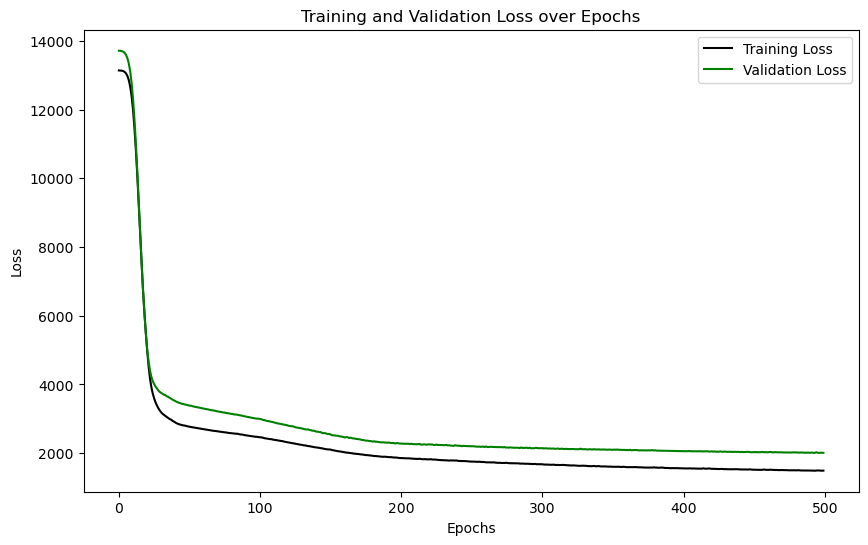

In [24]:
# Створення моделі
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Компіляція моделі
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss=tf.keras.losses.mae, optimizer=optimizer, metrics=['mae'])

# Навчання
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_split=0.2)

# оцінка моделі
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)

print("\nTraining Loss (MAE)", train_loss)
print("Test Loss (MAE)", test_loss)


#візуалізуємо результати навчання

# Розмір графіку
plt.figure(figsize=(10, 6))

# Завантаження даних для візуалізації
history_df = pd.DataFrame(history.history)
plt.plot(history_df['loss'], color='black', label='Training Loss')
plt.plot(history_df['val_loss'], color='g', label='Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Я використовував чотири шари три шари, оптимізатор Адам і 500 епох. Результати:

Training Loss (MAE) [1593.8580322265625, 1593.8580322265625]

Test Loss (MAE) [1634.123779296875, 1634.123779296875]

Не ідеально, але в цілому непогано.